In [1]:
import pandas as pd
import pylab as pl
from sklearn import datasets

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
cancer=datasets.load_breast_cancer()
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
from sklearn.cluster import KMeans

In [5]:
cluster_range=range(1,10)
cluster_errors=[]

for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(df)
    cluster_errors.append(clusters.inertia_)

In [6]:
import pandas as pd
clusters_df=pd.DataFrame({'num_clusters':cluster_range,
                          'cluster_errors':cluster_errors})
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,2.566772e+08
1,2,7.794310e+07
2,3,4.726484e+07
3,4,2.922654e+07
4,5,2.053524e+07
5,6,1.655872e+07
6,7,1.327830e+07
7,8,1.121453e+07
8,9,9.448860e+06


In [7]:
import matplotlib.pyplot as plt

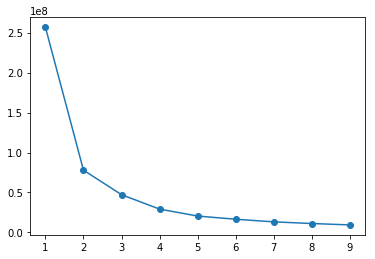

In [8]:
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')

In [9]:
kmean=KMeans(n_clusters=2)
kmean.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
centers=kmean.cluster_centers_
centers

array([[1.25562991e+01, 1.85703653e+01, 8.11234703e+01, 4.96061872e+02,
        9.48844977e-02, 9.10998174e-02, 6.24377642e-02, 3.34325434e-02,
        1.78057991e-01, 6.34540183e-02, 3.04190868e-01, 1.21515320e+00,
        2.15288059e+00, 2.37852922e+01, 7.17326256e-03, 2.34746895e-02,
        2.87455128e-02, 1.06363242e-02, 2.06135799e-02, 3.74750297e-03,
        1.40439018e+01, 2.47095434e+01, 9.19375114e+01, 6.19647945e+02,
        1.29959110e-01, 2.23311758e-01, 2.19214947e-01, 9.13298425e-02,
        2.83553653e-01, 8.32819406e-02],
       [1.93799237e+01, 2.16945802e+01, 1.28231298e+02, 1.18592977e+03,
        1.01294580e-01, 1.48612977e-01, 1.76939466e-01, 1.00698779e-01,
        1.91539695e-01, 6.06029008e-02, 7.42803817e-01, 1.22253817e+00,
        5.25058015e+00, 9.56781679e+01, 6.59868702e-03, 3.21766947e-02,
        4.24197710e-02, 1.56739847e-02, 2.03039695e-02, 3.95338931e-03,
        2.37094656e+01, 2.89126718e+01, 1.58496183e+02, 1.75302290e+03,
        1.40424733e-01,

In [11]:
labels=kmean.labels_
labels

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
acc = metrics.accuracy_score(cancer.target,labels)
print(acc)

0.14586994727592267


Accuracy of kmeans clustering when compared to actual values is 14 % fourteen percent

In [14]:
from sklearn import preprocessing
dfs=pd.DataFrame(preprocessing.scale(df),columns=df.columns)

In [15]:
cluster_range=range(1,10)
cluster_errors=[]

for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(dfs)
    cluster_errors.append(clusters.inertia_)

In [16]:
import pandas as pd
clusters_df=pd.DataFrame({'num_clusters':cluster_range,
                          'cluster_errors':cluster_errors})
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,17070.000000
1,2,11595.526607
2,3,10061.797818
3,4,9258.977209
4,5,8563.833475
5,6,7964.743912
6,7,7540.175197
7,8,7197.585265
8,9,6909.867738


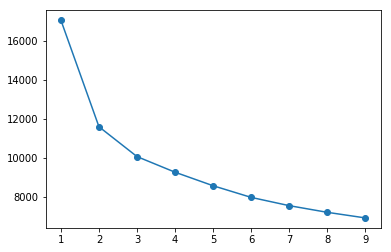

In [17]:
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')

In [18]:
kmean=KMeans(n_clusters=2)
kmean.fit(dfs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
centers=kmean.cluster_centers_
centers

array([[ 0.93362406,  0.4620646 ,  0.96730462,  0.92424266,  0.60116657,
         1.01678879,  1.11927003,  1.13499581,  0.59745592,  0.28828783,
         0.82729086,  0.0408053 ,  0.83306382,  0.77658149,  0.0460656 ,
         0.71559384,  0.64677371,  0.76877382,  0.14483925,  0.45777508,
         1.00100618,  0.48610441,  1.02895252,  0.96525332,  0.61097579,
         0.95149718,  1.0377126 ,  1.12132923,  0.58638203,  0.65089347],
       [-0.48299485, -0.23904142, -0.50041892, -0.47814154, -0.3110035 ,
        -0.52601873, -0.57903569, -0.58717117, -0.30908386, -0.1491409 ,
        -0.42798514, -0.02110994, -0.43097168, -0.40175149, -0.02383127,
        -0.37020054, -0.3345976 , -0.39771232, -0.07493017, -0.23682231,
        -0.51785387, -0.25147802, -0.53231144, -0.49935772, -0.31607814,
        -0.49224121, -0.53684332, -0.58010099, -0.30335497, -0.33672889]])

In [20]:
labels2=kmean.labels_
labels2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [21]:
acc = metrics.accuracy_score(cancer.target,labels2)
print(acc)

0.9050966608084359


Accuracy of normalized kmeans clustering when compared to actual values is 9 % nine percent


So we take unnormalized kmeans clustering for PCA

In [22]:
kmlabels=pd.Series(labels)
df1=dfs
#df1['kmlabels']=kmlabels
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [23]:
from sklearn.decomposition import PCA
pca=PCA(n_components=15)
pca.fit_transform(df1)

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
         1.03388319e-01, -6.90795779e-01, -6.01830894e-01],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
        -9.43529154e-01, -6.53474185e-01,  8.96698540e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
        -4.10626580e-01,  1.66799243e-02,  4.83418249e-01],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
         1.57417924e-01,  2.85690591e-01,  9.09994798e-02],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
         1.22519576e+00,  2.18707138e-01,  2.29544365e-01],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
         6.78896266e-01, -1.17073937e+00,  2.17414366e-01]])

In [24]:
pca.explained_variance_

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324,
        1.20948224,  0.67640888,  0.47745625,  0.41762878,  0.35131087,
        0.29443315,  0.26162116,  0.24178242,  0.15728615,  0.0943007 ])

In [25]:
print(pd.DataFrame(pca.components_,columns=df1.columns))

    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0      0.218902      0.103725        0.227537   0.220995         0.142590   
1     -0.233857     -0.059706       -0.215181  -0.231077         0.186113   
2     -0.008531      0.064550       -0.009314   0.028700        -0.104292   
3      0.041409     -0.603050        0.041983   0.053434         0.159383   
4      0.037786     -0.049469        0.037375   0.010331        -0.365089   
5      0.018741     -0.032179        0.017308  -0.001888        -0.286374   
6     -0.124088      0.011400       -0.114477  -0.051653        -0.140669   
7     -0.007452      0.130675       -0.018687   0.034674        -0.288975   
8     -0.223110      0.112699       -0.223739  -0.195586         0.006425   
9      0.095486      0.240934        0.086386   0.074956        -0.069293   
10     0.041471     -0.302243        0.016783   0.110170        -0.137022   
11     0.051067      0.254896        0.038926   0.065438         0.316727   

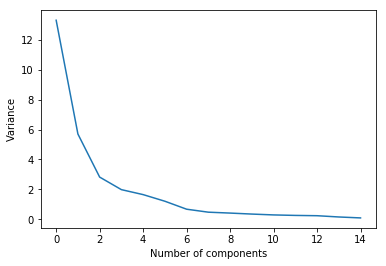

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.plot(pca.explained_variance_)
plt.xlabel('Number of components')
plt.ylabel('Variance')
plt.show()

We take number of components for PCA as two

In [27]:
from sklearn.model_selection import train_test_split
y=kmlabels
xtrain,xtest,ytrain,ytest=train_test_split(df1,y,test_size=0.2,random_state=0)

In [28]:
pca=PCA(2)
xtrain = pca.fit_transform(xtrain)  
xtest = pca.transform(xtest) 

In [29]:
pca.explained_variance_ratio_  

array([0.43766898, 0.19696535])

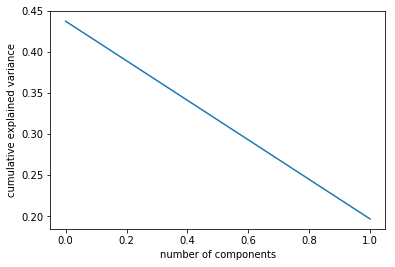

In [30]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(max_depth=2,random_state=0)
classifier.fit(xtrain,ytrain)

C:\Users\Mithilesh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [32]:
ypred = classifier.predict(xtest) 
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

In [33]:
cm = confusion_matrix(ytest, ypred)  
print(cm)  
print('Accuracy : ' + str(accuracy_score(ytest, ypred)) )

[[87  0]
 [15 12]]
Accuracy : 0.868421052631579


# Accuracy of random forest in unsupervised is 86.84%

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

C:\Users\Mithilesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
ypred=lr.predict(xtest)

In [37]:
acc = metrics.accuracy_score(ytest,ypred)
print(acc)

0.9649122807017544


In [39]:
cm=metrics.confusion_matrix(ytest,ypred)
print(cm)

[[84  3]
 [ 1 26]]


# Accuracy of logistic regression in unsupervised is 96.49%

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform',metric='euclidean')

In [52]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=21, p=2,
           weights='uniform')

In [53]:
ypred = knn.predict(xtest)

In [54]:
acc = metrics.accuracy_score(ytest,ypred)
print(acc)

0.9649122807017544


In [55]:
cm=metrics.confusion_matrix(ytest,ypred)
print(cm)

[[85  2]
 [ 2 25]]


# Accuracy of knn in unsupervised is 96.49%

In [57]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion = 'entropy')
model.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
ypred=model.predict(xtest)

In [60]:
acc=metrics.accuracy_score(ytest,ypred)
print(acc)

0.956140350877193


In [62]:
cm=metrics.confusion_matrix(ytest,ypred)
print(cm)

[[86  1]
 [ 4 23]]


# Accuracy of decision tree in unsupervised is 95.61%

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
model = GaussianNB()
model.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [66]:
ypred=model.predict(xtest)

In [67]:
acc=metrics.accuracy_score(ytest,ypred)
print(acc)

0.9736842105263158


In [68]:
cm=metrics.confusion_matrix(ytest,ypred)
print(cm)

[[86  1]
 [ 2 25]]


# Accuracy of naive bayes in unsupervised is 97.36%

In [69]:
from sklearn import svm

In [73]:
model = svm.SVC(kernel='linear', C=1, gamma=1) 

In [74]:
model.fit(xtrain, ytrain)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [78]:
ypred= model.predict(xtest)

In [79]:
acc=metrics.accuracy_score(ytest,ypred)
print(acc)

0.9736842105263158


In [80]:
cm=metrics.confusion_matrix(ytest,ypred)
print(cm)

[[85  2]
 [ 1 26]]


#  Accuracy of support vector machine in unsupervised is 97.36%

# Supervised:

In [83]:
from sklearn.model_selection import train_test_split
y=cancer.target
xtrain,xtest,ytrain,ytest=train_test_split(df1,y,test_size=0.2,random_state=0)

In [84]:
classifier=RandomForestClassifier(max_depth=2,random_state=0)
classifier.fit(xtrain,ytrain)
ypred = classifier.predict(xtest) 

C:\Users\Mithilesh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [85]:
cm = confusion_matrix(ytest, ypred)  
print(cm)  
print('Accuracy : ' + str(accuracy_score(ytest, ypred)) )

[[42  5]
 [ 3 64]]
Accuracy : 0.9298245614035088


#  Accuracy of random forest in supervised is 92.98%

In [87]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

C:\Users\Mithilesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [88]:
cm= confusion_matrix(ytest, ypred)  
print(cm)  
print('Accuracy : ' + str(accuracy_score(ytest, ypred)) )

[[45  2]
 [ 2 65]]
Accuracy : 0.9649122807017544


#  Accuracy of logistic regression in supervised is 96.49%

In [91]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform',metric='euclidean')
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)
cm= confusion_matrix(ytest, ypred)  
print(cm)  
print('Accuracy : ' + str(accuracy_score(ytest, ypred)) )

[[41  6]
 [ 0 67]]
Accuracy : 0.9473684210526315


#  Accuracy of knn in supervised is 94.73%

In [97]:
# from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion = 'entropy')
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
cm= confusion_matrix(ytest, ypred)  
print(cm)  
print('Accuracy : ' + str(accuracy_score(ytest, ypred)) )

[[43  4]
 [ 5 62]]
Accuracy : 0.9210526315789473


#  Accuracy of decision tree in supervised is 92.10%

In [95]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
cm= confusion_matrix(ytest, ypred)  
print(cm)  
print('Accuracy : ' + str(accuracy_score(ytest, ypred)) )

[[42  5]
 [ 6 61]]
Accuracy : 0.9035087719298246


#  Accuracy of NB in supervised is 90.35%

In [96]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=1, gamma=1) 
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
cm= confusion_matrix(ytest, ypred)  
print(cm)  
print('Accuracy : ' + str(accuracy_score(ytest, ypred)) )

[[45  2]
 [ 1 66]]
Accuracy : 0.9736842105263158


#  Accuracy of svm in supervised is 97.36%

# Inference: